In [25]:
import pandas as pd 
from pytrends.request import TrendReq

pytrends = TrendReq()

In [26]:
search_list = ["Oracle", "MySQL", "SQL Server", "PostgreSQL", "Cassandra"] #max of 5 values allowed
pytrends.build_payload(search_list, timeframe='today 12-m') 

In [27]:
df_ot = pd.DataFrame(pytrends.interest_over_time()).drop(columns='isPartial')
df_ot

/home/codespace/.python/current/lib/python3.10/site-packages/pytrends/request.py:247: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df = df['value'].apply(lambda x: pd.Series(
/home/codespace/.python/current/lib/python3.10/site-packages/pytrends/request.py:261: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df2 = df['isPartial'].apply(lambda x: pd.Series(


,Oracle,MySQL,SQL Server,PostgreSQL,Cassandra
date,,,,,
2022-10-09,91,62,42,22,13
2022-10-16,88,65,42,22,11
2022-10-23,87,59,39,20,12
2022-10-30,84,62,38,20,12
2022-11-06,88,64,41,22,11
2022-11-13,89,69,43,23,11
2022-11-20,79,61,43,19,10
2022-11-27,85,63,40,22,10
2022-12-04,82,63,38,22,10


In [28]:
# pytrends.get_historical_interest(search_list)

In [29]:
df_ibr = pytrends.interest_by_region(resolution='COUNTRY') # CITY, COUNTRY or REGION
df_ibr.sort_values('Oracle',ascending=False).head(10)

/home/codespace/.python/current/lib/python3.10/site-packages/pytrends/request.py:355: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df = df['value'].apply(lambda x: pd.Series(


,Oracle,MySQL,SQL Server,PostgreSQL,Cassandra
geoName,,,,,
Saudi Arabia,68,12,16,3,1
South Africa,65,13,16,3,3
United Arab Emirates,62,16,16,4,2
United Kingdom,50,19,18,6,7
United States,49,16,19,6,10
Egypt,47,22,25,5,1
Romania,46,25,16,9,4
Switzerland,46,20,20,9,5
France,44,21,12,14,9


Text(0, 0.5, 'Ranking')

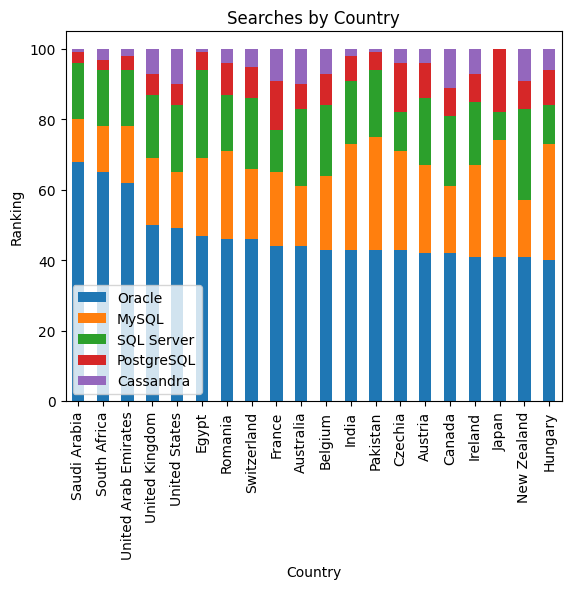

In [31]:
import matplotlib
from matplotlib import pyplot as plt

df2 = df_ibr.sort_values('Oracle', ascending=False).head(20)

df2.reset_index().plot(x='geoName', y=['Oracle', 'MySQL', 'SQL Server', 'PostgreSQL', 'Cassandra'], kind ='bar', stacked=True, title="Searches by Country")

plt.rcParams["figure.figsize"] = [20, 8]
plt.xlabel("Country")
plt.ylabel("Ranking")

/home/codespace/.python/current/lib/python3.10/site-packages/pytrends/request.py:355: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  result_df = df['value'].apply(lambda x: pd.Series(


Text(0, 0.5, 'Ranking')

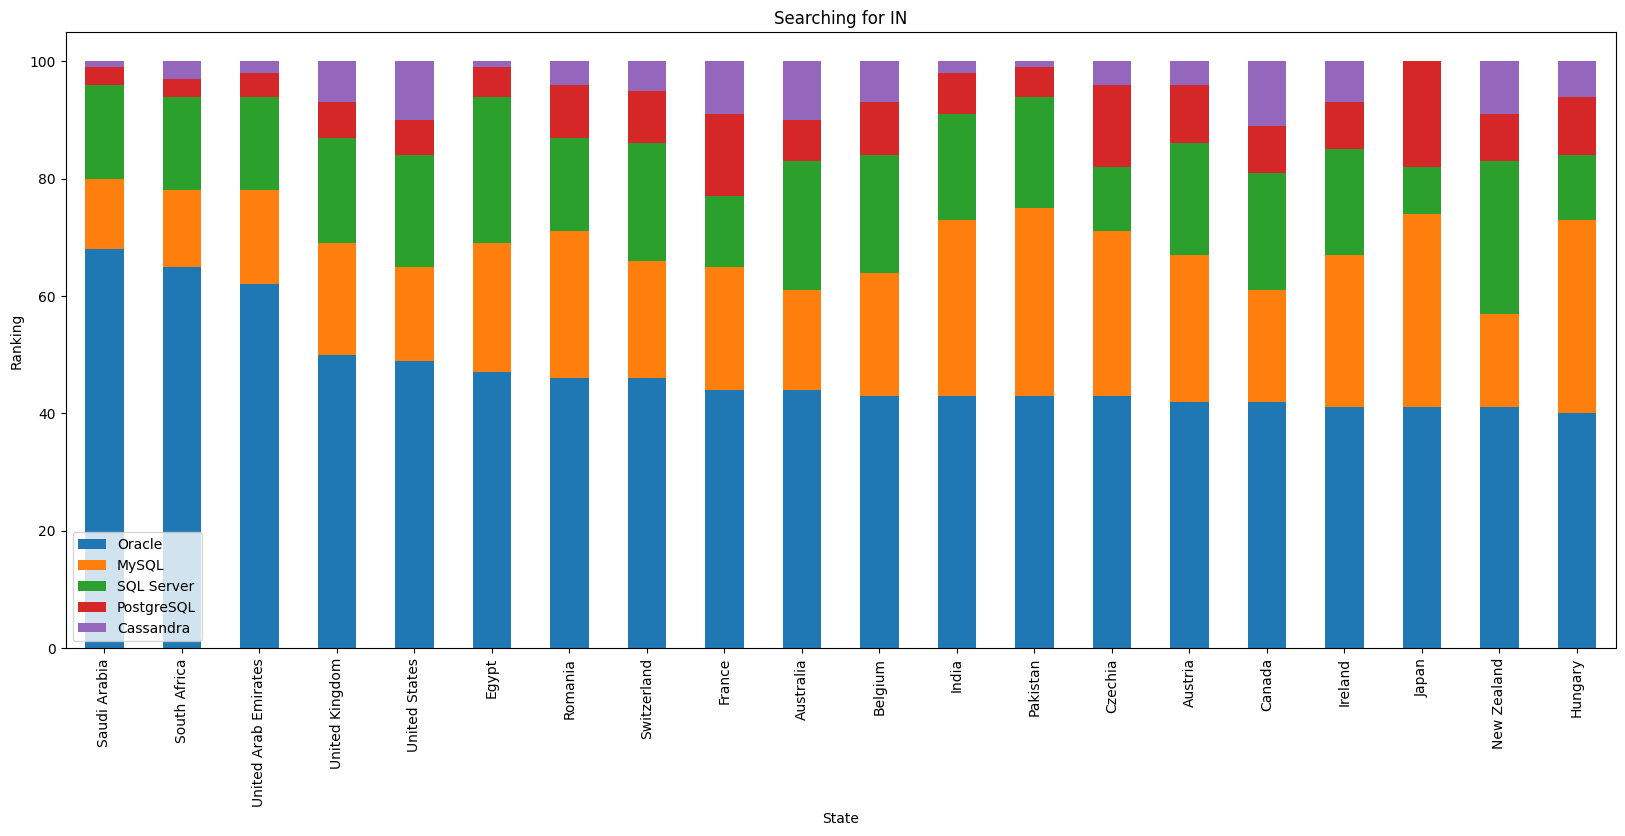

In [39]:
geo = 'IN'
pytrends.build_payload(search_list, geo=geo)
df_ibr = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
df_ibr.sort_values('Oracle', ascending=True).head(20)
df2.reset_index().plot(x='geoName', y=['Oracle', 'MySQL', 'SQL Server', 'PostgreSQL', 'Cassandra'], kind ='bar', stacked=True, title="test")
plt.rcParams["figure.figsize"] = [20, 8]
plt.title(f'Searching for {geo}')
plt.xlabel("State")
plt.ylabel("Ranking")

In [41]:
search_list = ["Oracle", "MySQL", "SQL Server", "PostgreSQL", "Cassandra"] #max of 5 values allowed
pytrends.build_payload(search_list, timeframe='today 12-m')

rq = pytrends.related_queries()
rq.values()

#display rising terms
rq.get('Oracle').get('rising')

,query,value
0,mylearn oracle,350
1,my learn oracle,350
2,oracle credit share price,100
3,oracle netsuite login,70
4,oracle hero,70
5,oracle dashboard,70
6,oracle stock price,60
7,hero connect,60
8,oracle stock price today,60
9,oracle academy,50


top queries for Oracle included

In [ ]:
rq.get('Oracle').get('top')

,query,value
0,the oracle,100
1,oracle sql,87
2,oracle cloud,54
3,oracle park,51
4,oracle database,50
5,what is oracle,39
6,oracle stock,30
7,oracle cards,25
8,oracle login,23
9,java oracle,22
